In [44]:
import pandas as pd
import numpy as np


In [45]:
df1 = pd.read_csv('DataCoSupplyChainDataset.csv')
df1, len(df1)

(            Type  Days for shipping (real)  Days for shipment (scheduled)  \
 0          DEBIT                         3                              4   
 1       TRANSFER                         5                              4   
 2           CASH                         4                              4   
 3          DEBIT                         3                              4   
 4        PAYMENT                         2                              4   
 ...          ...                       ...                            ...   
 180514      CASH                         4                              4   
 180515     DEBIT                         3                              2   
 180516  TRANSFER                         5                              4   
 180517   PAYMENT                         3                              4   
 180518   PAYMENT                         4                              4   
 
          Delivery Status  Late_delivery_risk  Category Id   C

In [46]:
df1.columns, len(df1.columns)

(Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
        'Delivery Status', 'Late_delivery_risk', 'Category Id', 'Category Name',
        'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
        'Order City', 'Order Country', 'order date (DateOrders)', 'Order Id',
        'Order Item Cardprod Id', 'Order Item Discount',
        'Order Item Discount Rate', 'Order Item Id', 'Order Item Quantity',
        'Order Region', 'Order State', 'Order Status', 'Product Card Id',
        'Product Category Id', 'Product Name', 'shipping date (DateOrders)',
        'Shipping Mode'],
       dtype='object'),
 29)

In [47]:
df1.corr()

,Days for shipping (real),Days for shipment (scheduled),Late_delivery_risk,Category Id,Department Id,Latitude,Longitude,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Quantity,Product Card Id,Product Category Id
Days for shipping (real),1.000000,0.515880,0.401415,-0.000348,-0.001631,-0.004073,0.003911,-0.001711,-0.000859,0.002231,0.001467,-0.001769,-0.000811,-0.000859,-0.000348
Days for shipment (scheduled),0.515880,1.000000,-0.369352,-0.000367,-0.000262,-0.005300,0.003675,-0.001878,-0.000431,0.002897,0.000065,-0.001848,-0.002925,-0.000431,-0.000367
Late_delivery_risk,0.401415,-0.369352,1.000000,0.001752,0.001077,0.000679,-0.001915,-0.001293,0.001490,-0.000750,0.000404,-0.001376,-0.000139,0.001490,0.001752
Category Id,-0.000348,-0.000367,0.001752,1.000000,0.888835,0.002195,-0.002320,0.198496,0.991092,0.140180,0.000572,0.186796,-0.302408,0.991092,1.000000
Department Id,-0.001631,-0.000262,0.001077,0.888835,1.000000,0.002460,-0.002435,0.106757,0.906117,0.144617,0.000255,0.101676,-0.265437,0.906117,0.888835
Latitude,-0.004073,-0.005300,0.000679,0.002195,0.002460,1.000000,-0.525122,-0.002984,0.002031,-0.002997,-0.003889,-0.003058,-0.001853,0.002031,0.002195
Longitude,0.003911,0.003675,-0.001915,-0.002320,-0.002435,-0.525122,1.000000,0.002540,-0.002580,0.002343,0.000526,0.002532,0.004467,-0.002580,-0.002320
Order Id,-0.001711,-0.001878,-0.001293,0.198496,0.106757,-0.002984,0.002540,1.000000,0.163416,0.049385,0.000484,0.999623,-0.087073,0.163416,0.198496
Order Item Cardprod Id,-0.000859,-0.000431,0.001490,0.991092,0.906117,0.002031,-0.002580,0.163416,1.000000,0.147294,0.000731,0.154077,-0.312555,1.000000,0.991092
Order Item Discount,0.002231,0.002897,-0.000750,0.140180,0.144617,-0.002997,0.002343,0.049385,0.147294,1.000000,0.659955,0.048866,0.065379,0.147294,0.140180


In [48]:
import jieba
import gensim
import re

# wordlist = [[word.replace(' ', '')] for word in df1.columns]
wordlist = [re.split(' |_', word) for word in df1.columns]
# wordlist = df1.columns
# words = []
# for word in wordlist:
#     words.extend(word)
words = wordlist
words
w2vmodel = gensim.models.Word2Vec(words, min_count=1)
keys = w2vmodel.wv.key_to_index
keys.keys(), words
# df1.columns.values



(dict_keys(['Order', 'Id', 'Item', 'Name', 'Product', 'Category', 'Department', 'Status', 'date', '(DateOrders)', 'Discount', 'shipping', 'for', 'Days', '(scheduled)', 'shipment', 'Delivery', '(real)', 'Late', 'delivery', 'risk', 'Mode', 'Longitude', 'Latitude', 'Shipping', 'Market', 'City', 'Country', 'order', 'Cardprod', 'Rate', 'Quantity', 'Region', 'State', 'Card', 'Type']),
 [['Type'],
  ['Days', 'for', 'shipping', '(real)'],
  ['Days', 'for', 'shipment', '(scheduled)'],
  ['Delivery', 'Status'],
  ['Late', 'delivery', 'risk'],
  ['Category', 'Id'],
  ['Category', 'Name'],
  ['Department', 'Id'],
  ['Department', 'Name'],
  ['Latitude'],
  ['Longitude'],
  ['Market'],
  ['Order', 'City'],
  ['Order', 'Country'],
  ['order', 'date', '(DateOrders)'],
  ['Order', 'Id'],
  ['Order', 'Item', 'Cardprod', 'Id'],
  ['Order', 'Item', 'Discount'],
  ['Order', 'Item', 'Discount', 'Rate'],
  ['Order', 'Item', 'Id'],
  ['Order', 'Item', 'Quantity'],
  ['Order', 'Region'],
  ['Order', 'State'],

In [49]:
keys.keys(), keys.values()

(dict_keys(['Order', 'Id', 'Item', 'Name', 'Product', 'Category', 'Department', 'Status', 'date', '(DateOrders)', 'Discount', 'shipping', 'for', 'Days', '(scheduled)', 'shipment', 'Delivery', '(real)', 'Late', 'delivery', 'risk', 'Mode', 'Longitude', 'Latitude', 'Shipping', 'Market', 'City', 'Country', 'order', 'Cardprod', 'Rate', 'Quantity', 'Region', 'State', 'Card', 'Type']),
 dict_values([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]))

In [50]:
from collections import defaultdict
frequency = defaultdict(int)
for sentence in words:
    for word in sentence:
        frequency[word] += 1
words_frequency = [frequency[key] for key in keys.keys()]
words_frequency = pd.DataFrame({"单词":keys.keys(), "频率":words_frequency})
words_frequency

,单词,频率
0,Order,11
1,Id,7
2,Item,5
3,Name,3
4,Product,3
5,Category,3
6,Department,2
7,Status,2
8,date,2
9,(DateOrders),2


(36, 100) (36, 2)


array([[-5.3725392e-04,  2.3800520e-04,  5.1045856e-03, ...,
        -7.0424299e-03,  8.9866936e-04,  6.3937530e-03],
       [-8.6241271e-03,  3.6685660e-03,  5.1909899e-03, ...,
        -2.3947952e-03, -9.5114876e-03,  4.5023221e-03],
       [ 9.6548298e-05,  3.0770493e-03, -6.8103028e-03, ...,
         5.0949107e-04,  8.2140388e-03, -7.0183994e-03],
       ...,
       [ 4.8006605e-03, -3.6283778e-03, -4.2648101e-03, ...,
        -7.3600505e-03,  9.7305588e-03, -1.5858245e-03],
       [-1.5110135e-03, -4.0345048e-03, -4.3988540e-03, ...,
        -3.4136439e-03, -2.9241275e-03,  5.6689288e-03],
       [ 7.9434970e-03, -6.4516068e-03,  5.7945298e-03, ...,
         8.3017135e-03, -3.5923265e-03, -9.8455455e-03]], dtype=float32)

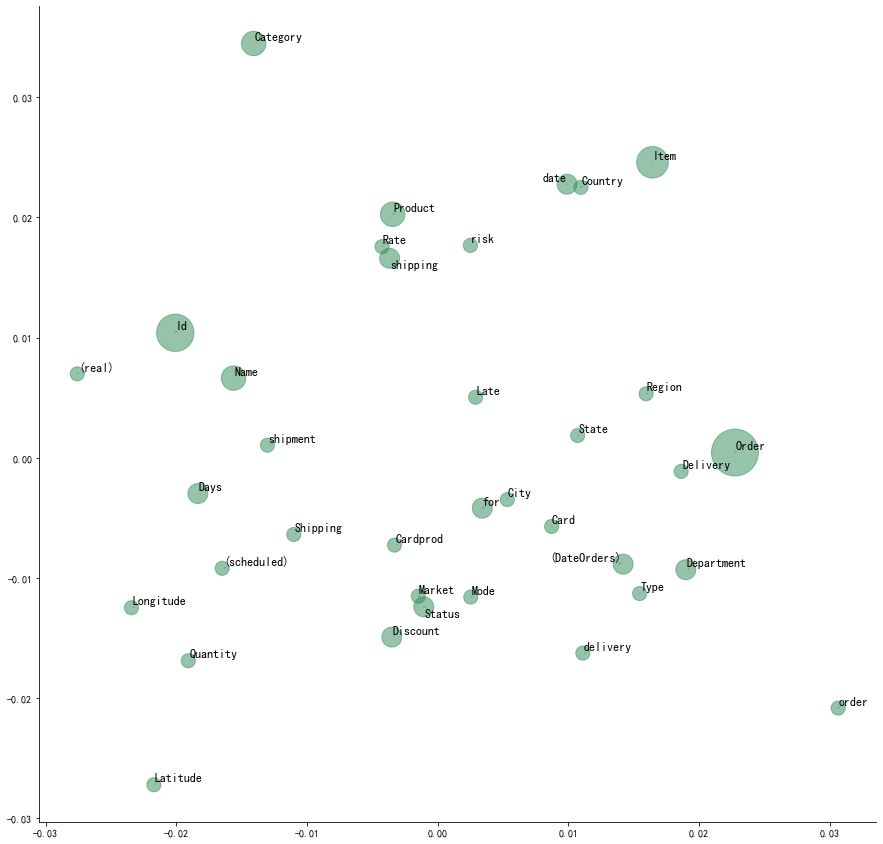

In [51]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = w2vmodel.wv[keys]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
print(X.shape, result.shape)

ig, ax = plt.subplots(figsize=(15,15))
ax.scatter(result[:,0], result[:,1], c='SeaGreen', s=words_frequency['频率']*200, alpha=0.5)

from adjustText import adjust_text
new_texts = [plt.text(x, y, text, fontsize=12) for x, y, text in zip(result[:, 0], result[:, 1],  keys.keys())]
adjust_text(new_texts,
            only_move={'text':'x'},
            arrowprops=dict(arrowstyle='-', color='grey'))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
X

Text(0, 0.5, '轮廓系数')

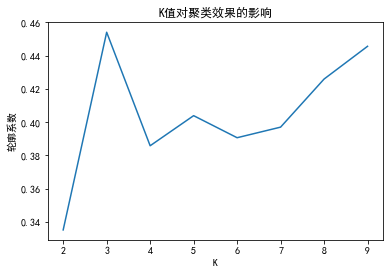

In [52]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt

# result = model.wv[words]
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
ss = []
krange = list(range(2, 10))
for k in range(2, 10):
    model = KMeans(n_clusters=k, random_state=0)
    model = model.fit(result)
    ss.append(silhouette_score(result, model.labels_))
plt.plot(krange, ss)
plt.title('K值对聚类效果的影响')
plt.xlabel('K')
plt.ylabel('轮廓系数')


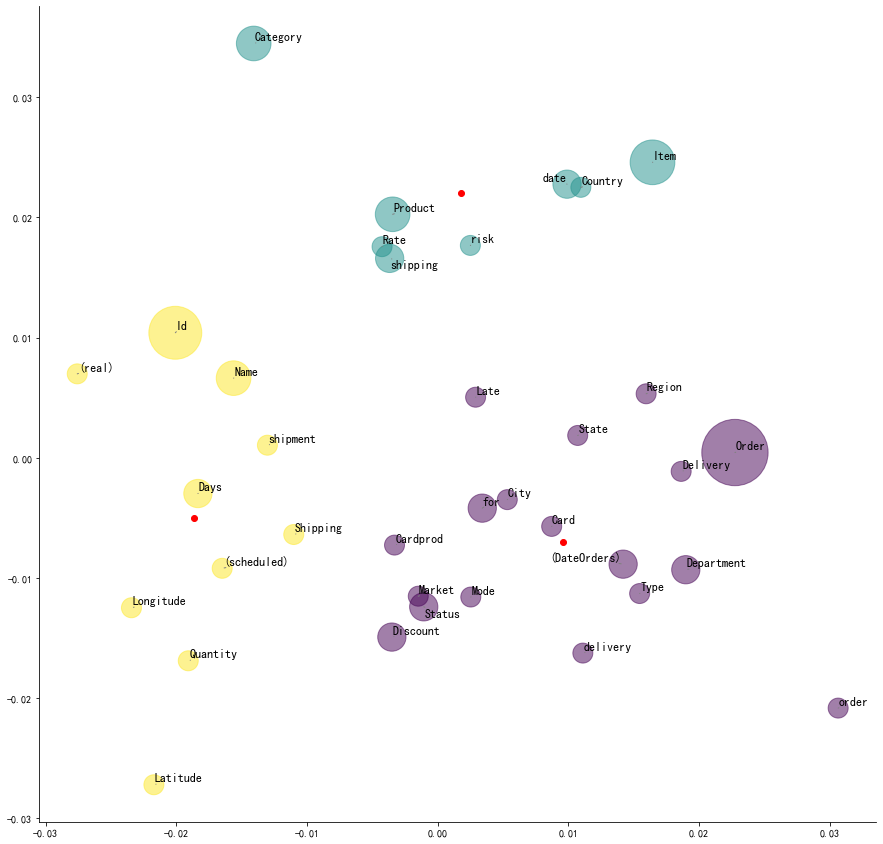

In [53]:
#用PCA降维数据后的分类结果
fig, ax = plt.subplots(figsize=(15, 15))
model = KMeans(n_clusters=3, random_state=15, init="k-means++")
model = model.fit(result)
# model = model.fit(X)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# X = w2vmodel.wv[keys]
# pca = PCA(n_components=2)
# result = pca.fit_transform(X)
# print(X.shape, result.shape, model.cluster_centers_.shape)

#将聚类的结果和中心点的结果都画在原图里
plt.scatter(result[:,0], result[:,1], c=model.labels_, s=words_frequency['频率']*400, alpha=0.5)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color='red')

new_texts = [plt.text(x,y,text, fontsize=12) for x,y,text in zip(result[:,0], result[:,1], keys.keys())]
adjust_text(new_texts, 
            only_move={'text': 'x'},
            arrowprops=dict(arrowstyle='-', color='grey'))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [54]:
# arr = model.predict(w2vmodel.wv[['Benefit', 'Benefit']].reshape(-1, 2))
print(w2vmodel.wv[['Department', 'Name']].shape)
pca_pred = PCA(n_components=2)
vec = pca_pred.fit_transform(w2vmodel.wv[['Department', 'Name']])
arr = model.predict(vec)
arr
# arr = model.predict(w2vmodel.wv['for'].reshape(-1, 1))
# arr, model.labels_, model.cluster_centers_

(2, 100)


array([2, 0])

In [55]:
df1.columns.values
# ' '.join(df1.columns).split(' ')

array(['Type', 'Days for shipping (real)',
       'Days for shipment (scheduled)', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name',
       'Department Id', 'Department Name', 'Latitude', 'Longitude',
       'Market', 'Order City', 'Order Country', 'order date (DateOrders)',
       'Order Id', 'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Quantity',
       'Order Region', 'Order State', 'Order Status', 'Product Card Id',
       'Product Category Id', 'Product Name',
       'shipping date (DateOrders)', 'Shipping Mode'], dtype=object)

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
import jieba
from collections import Counter, defaultdict

tfvec = TfidfVectorizer()
# tfvec = CountVectorizer()
kmodel = KMeans(n_clusters=3, init='k-means++', random_state=15)
cv_fit = tfvec.fit_transform(list(df1.columns)).toarray()
# cv_fit = tfvec.fit_transform(list(df1.columns)).todense()

y_pred = kmodel.fit_predict(cv_fit)
# y_pred, kmodel.labels_
cv_fit[:10], len(cv_fit)
df1.columns


Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Delivery Status', 'Late_delivery_risk', 'Category Id', 'Category Name',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'order date (DateOrders)', 'Order Id',
       'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Quantity',
       'Order Region', 'Order State', 'Order Status', 'Product Card Id',
       'Product Category Id', 'Product Name', 'shipping date (DateOrders)',
       'Shipping Mode'],
      dtype='object')

(29, 32) (29, 2)


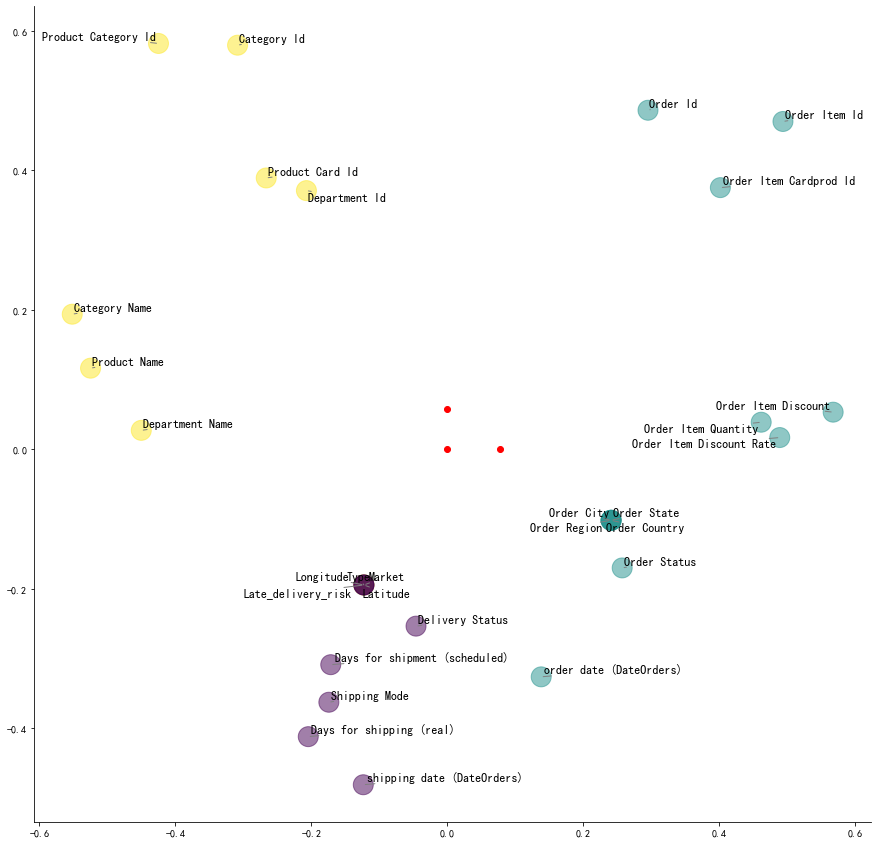

In [57]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

X = cv_fit

pca = PCA(n_components=2)
result = pca.fit_transform(X)
# ts = TSNE(n_components=2, perplexity=25)
# result = ts.fit_transform(X)
print(X.shape, result.shape)


from adjustText import adjust_text
fig, ax = plt.subplots(figsize=(15, 15))

#将聚类的结果和中心点的结果都画在原图里
ax.scatter(result[:,0], result[:,1], c=y_pred, s=400, alpha=0.5)
ax.scatter(kmodel.cluster_centers_[:,0], kmodel.cluster_centers_[:,1], color='red')

new_texts = [plt.text(x,y,text, fontsize=12) for x,y,text in zip(result[:,0], result[:,1], df1.columns)]
adjust_text(new_texts, 
            only_move={'text': 'x'},
            arrowprops=dict(arrowstyle='-', color='grey'))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)